In [69]:
import pickle
import numpy as np

In [70]:
import os, sys
WORKING_DIR = os.path.dirname(os.path.abspath(''))
sys.path.insert(1, os.path.join(WORKING_DIR,'LensQuEst'))

#to get latex to work, shoulldn't be necessary for most ppl
os.environ['PATH'] = "%s:/usr/local/cuda-11.2/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/opt/anaconda/bin:/home/delon/texlive/bin/x86_64-linux:/home/delon/.local/bin:/home/delon/bin"%os.environ['PATH']

In [71]:
###
N_runs = 2
# number of pixels for the flat map
nX = 400 # 1200
nY = 400 #1200
template_fname = 'Cls_%dx%d.pkl'%(nX,nY)
###

In [72]:
f = open(template_fname, 'rb') 
Cls_tot = pickle.load(f)
f.close()

In [73]:
final_keys = ['(Auto QE)-(Power Spectrum(hat NL))', 
              '(Auto QE)-(Power Spectrum(hat NL)) [M]',
              '(Auto QE)-(Power Spectrum(hat NL)) [M+MFS]']


# #quick fix
# # forgot that errorbars should also be scale 1/fsky, 
# for key in final_keys:  
#     if(key == '(Auto QE)-(Power Spectrum(hat NL))'):
#         continue
#     Cls2_tmp = np.transpose(Cls_tot[key], axes=(1,0,2))[2]/fsky
#     tmp_cl = np.transpose(Cls_tot[key], axes=(1,0,2))
#     tmp_cl[2] = Cls2_tmp
#     tmp_cl = np.transpose(tmp_cl, (1,0,2))
#     Cls_tot[key] = tmp_cl

    
# f = open('Cls_%dx%d_FIXED.pkl'%(nX,nY), 'wb') 
# pickle.dump(Cls_tot, f)
# print(Cls_tot)
# f.close()


{'(Auto QE)-(Power Spectrum(hat NL))': array([[[1.10134950e+00, 1.32459194e+00, 1.59308540e+00, ...,
         6.46451210e+03, 7.62336414e+03, 9.02805575e+03],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.96321283e-03, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.03603055e-05, 0.00000000e+00, 0.00000000e+00]],

       [[1.10134950e+00, 1.32459194e+00, 1.59308540e+00, ...,
         6.46451210e+03, 7.62336414e+03, 9.02805575e+03],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.36638871e-03, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.45416066e-05, 0.00000000e+00, 0.00000000e+00]],

       [[1.10134950e+00, 1.32459194e+00, 1.59308540e+00, ...,
         6.46451210e+03, 7.62336414e+03, 9.02805575e+03],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.95595915e-03, 0.00000000e+00, 0.00000000e+00

In [42]:
#https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


from scipy.ndimage import gaussian_filter 
from scipy.fft import fft2

mask = 1-rgb2gray(plt.imread('mask_simple%dx%d.png'%(nX, nY)))
apodized_mask = gaussian_filter(mask, 5)


In [43]:
fsky = np.sum(apodized_mask)/(nX*nY)


for i in range(N_runs-1):
    for key in final_keys:
        assert(all(Cls_tot[key][i][0] == Cls_tot[key][i+1][0]))
lCen =  Cls_tot[final_keys[0]][0][0]
Cls = {}
sCls = {}
for key in final_keys:
    Cls[key] = np.sum(np.transpose(Cls_tot[key], axes=[1,2,0])[1], axis=1)/N_runs
    sCls[key] = np.sqrt(np.sum(np.square(np.transpose(Cls_tot[key], axes=[1,2,0])[2]), axis=1))/(np.sqrt(N_runs))

[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (8.798484293129309e-05, 5.8753802895802545e-06), (0.0, 0.0), (7.658745991475826e-05, 6.373219673877254e-06), (0.0, 0.0), (7.306326229818689e-05, 2.9873421877235173e-06), (0.0, 0.0), (6.195433050303936e-05, 2.372683504883143e-06), (4.994387672729716e-05, 2.4632503415891465e-06), (4.647194914417228e-05, 1.9405153998705376e-06), (4.111583016723649e-05, 1.2852305086825168e-06), (3.4247609278521596e-05, 1.2168803781062943e-06), (2.9393924958117987e-05, 9.092494526217365e-07), (2.4176016696572968e-05, 6.923142554267738e-07), (1.9952093271022583e-05, 5.629107370444032e-07), (1.566422039284095e-05, 4.5565258673294035e-07), (1.2324280894312609e-05, 3.359061678124979e-07), (9.966253778540524e-06, 2.721929796942526e-07), (7.821178740032737e-06, 2.1361268700258972e-07), (6

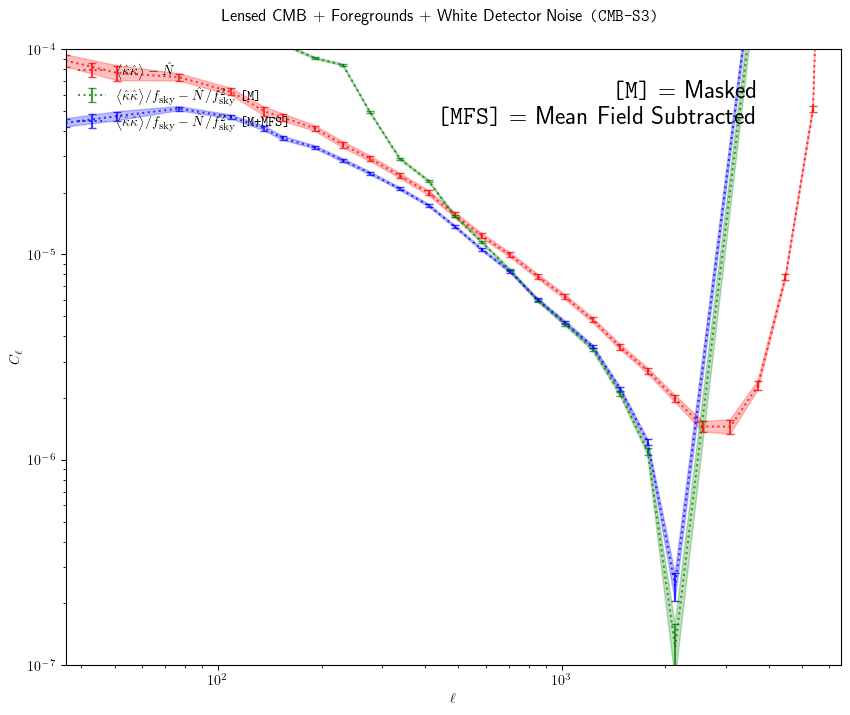

In [48]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, figsize=(10,8), sharey=True)
axs = [axs]
fig.subplots_adjust(wspace=0, hspace=0)

# ell = baseMap.l.flatten()
factor = 1. # lCen**2
labels ={'Standard QE': r'${\big<\hat \kappa \hat\kappa \big>}$',
        'AFC Eq(7)': r'Computed noise $\hat N$',
        '(Auto QE)-(Power Spectrum(hat NL))': r'${\big<\hat \kappa \hat\kappa \big>- \hat N}$',
        'Standard QE Masked MFS': r'${\big<\hat \kappa \hat\kappa \big>}/f_{\rm sky}$ \texttt{[M+MFS]}',
        'AFC Eq(7) Masked MFS': r'Computed noise $\hat N$ \texttt{[M+MFS]}',
        '(Auto QE)-(Power Spectrum(hat NL)) [M+MFS]': r'${\big<\hat \kappa \hat\kappa \big>/f_{\rm sky}- \hat N}/f_{\rm sky}^2$ \texttt{[M+MFS]}',
        'Standard QE Masked': r'${\big<\hat \kappa \hat\kappa \big>}/f_{\rm sky}$ \texttt{[M]}',
        'AFC Eq(7) Masked': r'Computed noise $\hat N$ \texttt{[M]}',
        '(Auto QE)-(Power Spectrum(hat NL)) [M]': r'${\big<\hat \kappa \hat\kappa \big>/f_{\rm sky}- \hat N}/f_{\rm sky}^2$ \texttt{[M]}'
}

col = {'Standard QE': 'r',
        'Standard QE Masked MFS': 'b',
        'AFC Eq(7)': 'r',
        'AFC Eq(7) Masked MFS': 'b',
        '(Auto QE)-(Power Spectrum(hat NL))': 'r',
        '(Auto QE)-(Power Spectrum(hat NL)) [M+MFS]': 'b',
        'Standard QE Masked': 'g',
        'AFC Eq(7) Masked': 'g',
        '(Auto QE)-(Power Spectrum(hat NL)) [M]': 'g',

}

##################################

bnds = {'x':[],'y':[]}
for key in final_keys:    
    Cl = Cls[key]
    sCl = sCls[key]
    Ipos = np.where(Cl>=1e-10)
    Ineg = np.where(Cl<0.)

    ax = axs[0]
    fctr = factor
    print(list(zip(Cl, sCl)))
    ax.errorbar(lCen[Ipos], factor*(Cl[Ipos]), yerr=fctr*sCl[Ipos], c=col[key], alpha=.75, fmt=':', capsize=3, label=labels[key], capthick=1)
    tmp_data = {
       'x': lCen[Ipos],
       'y1': [y - e for y, e in zip(factor*(Cl[Ipos]), sCl[Ipos])],
       'y2': [y + e for y, e in zip(factor*(Cl[Ipos]), sCl[Ipos])]}
    ax.fill_between(**tmp_data, color=col[key], alpha=.25)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$\ell$')
    ax.set_ylabel(r'$C_\ell$')

    bnds['x'] += [np.min(lCen[Ipos]), np.max(lCen[Ipos])]
    bnds['y'] += [np.min(Cl[Ipos]), factor*np.max(Cl[Ipos])]


fig.suptitle(r'Lensed CMB + Foregrounds + White Detector Noise \texttt{(CMB-S3)}', y=0.93)

for ax in axs:
    ax.set_xlim(np.min(bnds['x']), np.max(bnds['x']))
    ax.set_ylim(1e-7, 1e-4)
    print(np.max(bnds['y']))


    l=ax.legend(frameon=False, loc='upper left')
    s = r'\texttt{[M]} = Masked'
    s += '\n'
    s += r'\texttt{[MFS]} = Mean Field Subtracted'
    ax.text(.90, .95,
       s=s,
       transform=ax.transAxes,
       horizontalalignment='right',
       verticalalignment='top',
      fontsize=18)





In [45]:
plt.rcParams.update({
    "text.usetex": True,})